Shape of dataset: (100, 4)
   purchase_amount  review_score  days_to_delivery returned
0       687.011818      3.778615                 4       no
1       325.972093      2.458683                 1      yes
2       685.382724      3.954024                 7       no
3       291.100577      3.666468                14      yes
4       209.806672      1.478248                 2       no

Missing values:
 purchase_amount     0
review_score        0
days_to_delivery    0
returned            0
dtype: int64

Accuracy Score: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.57      0.73      0.64        11

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20


Confusion Matrix:
 [[3 6]
 [3 8]]


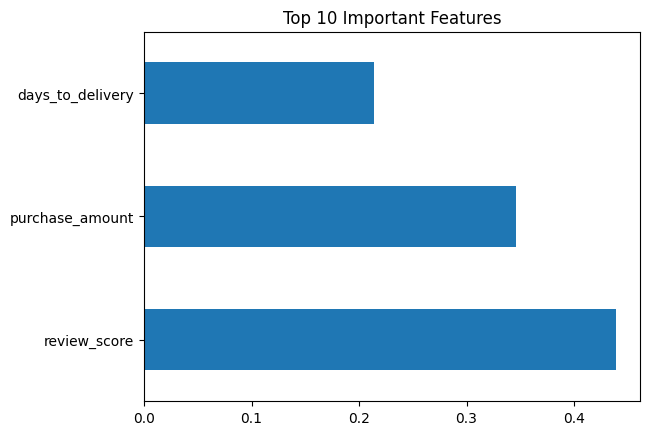

In [2]:
# Product Return Prediction
# Author: Abhay Singh Tomar
# Roll No: 2428cseai1639
# ----------------------------------------------

# 1. Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load the dataset
df = pd.read_csv('/content/product_return.csv')  # Adjust path if not running on Colab

# 3. Data Overview
print("Shape of dataset:", df.shape)
print(df.head())

# 4. Check for null values
print("\nMissing values:\n", df.isnull().sum())

# 5. Basic Data Preprocessing
# Fill or drop missing values
df = df.dropna()

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 6. Feature and target separation
X = df.drop('returned', axis=1)
y = df['returned']


# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 10. Predictions
y_pred = model.predict(X_test)

# 11. Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 12. Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()
